# INTRODUCTION
* In this kernel, we will learn how to use plotly library.
    * Plotly library: Plotly's Python graphing library makes interactive, publication-quality graphs online. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.

<br>Content:
1. [Loading Data and Explanation of Features](#1)
1. [Line Charts](#2)
1. [Scatter Charts](#3)
1. [Bar Charts](#4)
1. [Pie Charts](#5)
1. [Bubble Charts](#6)
1. [Histogram](#7)
1. [Word Cloud](#8)
1. [Box Plot](#9)
1. [Scatter Plot Matrix](#10)
1. Map Plots: https://www.kaggle.com/kanncaa1/time-series-prediction-with-eda-of-world-war-2
1. Data Visualization
    1. Seaborn: https://www.kaggle.com/kanncaa1/seaborn-for-beginners
    1. Bokeh 1: https://www.kaggle.com/kanncaa1/interactive-bokeh-tutorial-part-1
    1. Bokeh 2: https://www.kaggle.com/kanncaa1/interactive-bokeh-tutorial-part-
    1. Rare Visualization: https://www.kaggle.com/kanncaa1/rare-visualization-tools
1. [Inset Plots](#11)
1. [3D Scatter Plot with Colorscaling](#12)
1. [Multiple Subplots](#13)
1. Earthquake Animation: https://www.kaggle.com/kanncaa1/earthquake-animation-with-plotly



In [3]:
# pip install plotly
# pip install wordcloud

In [1]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
# import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./data"))

# Any results you write to the current directory are saved as output.

import warnings
warnings.filterwarnings("ignore")

['medium_data_2019_01_06', 'school_earnings.csv', 'timesData.csv', 'tips.csv']


<a id="1"></a> <br>
# Loading Data and Explanation of Features
<font color='red'>
* timesData includes 14 features that are:
    <font color='black'>
        
    * world_rank             
    * university_name       
    * country               
    * teaching                
    * international            
    * research                 
    * citations                
    * income                   
    * total_score              
    * num_students             
    * student_staff_ratio      
    * international_students   
    * female_male_ratio        
    * year 

In [2]:
#py.offline.init_notebook_mode(connected=True) 
# Load data that we will use.
timesData = pd.read_csv("./data/timesData.csv")

In [3]:
# information about timesData
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [3]:
timesData.head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


In [5]:
timesData['year'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

<a id="2"></a> <br>
# Line Charts
Line Charts Example: Citation and Teaching vs World Rank of Top 100 Universities
* Import graph_objs as *go*
* Creating traces
    * x = x axis
    * y = y axis
    * mode = type of plot like marker, line or line + markers
    * name = name of the plots
    * marker = marker is used with dictionary. 
        * color = color of lines. It takes RGB (red, green, blue) and opacity (alpha)
    * text = The hover text (hover is curser)
* data = is a list that we add traces into it
* layout = it is dictionary.
    * title = title of layout
    * x axis = it is dictionary
        * title = label of x axis
        * ticklen = length of x axis ticks
* fig = it includes data and layout
* iplot() = plots the figure(fig) that is created by data and layout

In [5]:
# prepare data frame
df = timesData.iloc[:100,:]

# import graph objects as "go"
import plotly.graph_objs as go

# Creating trace1
trace1 = go.Scatter(
                    x = df['world_rank'],
                    y = df['citations'],
                    name = 'citations',
                    mode= 'lines',
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text = df['university_name'])

# Creating trace2
trace2 = go.Scatter(
                    x = df['world_rank'],
                    y = df['teaching'],
                    name = 'teaching',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text = df['university_name'])

data = [trace1, trace2]

layout = dict(title = 'Citation and Teaching vs World Rank of Top 100 Universities',
             xaxis= dict(title= 'World Rank',ticklen= 5)
           )

fig = go.Figure(data = data, layout=layout)

iplot(fig)

In [12]:
# pip install nbformat

<a id="3"></a> <br>
# Scatter
Scatter Example: Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years
* Import graph_objs as *go*
* Creating traces
    * x = x axis
    * y = y axis
    * mode = type of plot like marker, line or line + markers
    * name = name of the plots
    * marker = marker is used with dictionary. 
        * color = color of lines. It takes RGB (red, green, blue) and opacity (alpha)
    * text = The hover text (hover is curser)
* data = is a list that we add traces into it
* layout = it is dictionary.
    * title = title of layout
    * x axis = it is dictionary
        * title = label of x axis
        * ticklen = length of x axis ticks
        * zeroline = showing zero line or not
    * y axis = it is dictionary and same with x axis
* fig = it includes data and layout
* iplot() = plots the figure(fig) that is created by data and layout

In [6]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:100,:]
df2015 = timesData[timesData.year == 2015].iloc[:100,:]
df2016 = timesData[timesData.year == 2016].iloc[:100,:]
df2016['world_rank'] = df2016['world_rank'].str.replace('=','')

df2014['world_rank'] = df2014['world_rank'].astype(int)
df2015['world_rank'] = df2015['world_rank'].astype(int)
df2016['world_rank'] = df2016['world_rank'].astype(int)


# import graph objects as "go"
import plotly.graph_objs as go

# creating trace1
trace1 =go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df2014.university_name)
# creating trace2
trace2 =go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2015.university_name)
# creating trace3
trace3 =go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2016.university_name)

data = [trace1, trace2, trace3]

layout = dict(title = 'Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Citation',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)
# fig = go.Figure(data = data, layout=layout)

iplot(fig)

<a id="4"></a> <br>
# Bar Charts
First Bar Charts Example: citations and teaching of top 3 universities in 2014 (style1)
* Import graph_objs as *go*
* Creating traces
    * x = x axis
    * y = y axis
    * mode = type of plot like marker, line or line + markers
    * name = name of the plots
    * marker = marker is used with dictionary. 
        * color = color of lines. It takes RGB (red, green, blue) and opacity (alpha)
        * line = It is dictionary. line between bars
            * color = line color around bars
    * text = The hover text (hover is curser)
* data = is a list that we add traces into it
* layout = it is dictionary.
    * barmode = bar mode of bars like grouped
* fig = it includes data and layout
* iplot() = plots the figure(fig) that is created by data and layout

In [13]:
help(go.Bar)

Help on class Bar in module plotly.graph_objs._bar:

class Bar(plotly.basedatatypes.BaseTraceType)
 |  Bar(arg=None, alignmentgroup=None, base=None, basesrc=None, cliponaxis=None, constraintext=None, customdata=None, customdatasrc=None, dx=None, dy=None, error_x=None, error_y=None, hoverinfo=None, hoverinfosrc=None, hoverlabel=None, hovertemplate=None, hovertemplatesrc=None, hovertext=None, hovertextsrc=None, ids=None, idssrc=None, insidetextanchor=None, insidetextfont=None, legend=None, legendgroup=None, legendgrouptitle=None, legendrank=None, legendwidth=None, marker=None, meta=None, metasrc=None, name=None, offset=None, offsetgroup=None, offsetsrc=None, opacity=None, orientation=None, outsidetextfont=None, selected=None, selectedpoints=None, showlegend=None, stream=None, text=None, textangle=None, textfont=None, textposition=None, textpositionsrc=None, textsrc=None, texttemplate=None, texttemplatesrc=None, uid=None, uirevision=None, unselected=None, visible=None, width=None, widthsr

In [7]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
# import graph objects as "go"
import plotly.graph_objs as go

# create trace1 
trace1 = go.Bar(x = df2014['university_name'],
               y = df2014['citations'],
               name = 'citations',
               marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                            line = dict(color='rgb(0,0,0)', width = 1.5)),
               text = df2014['country'])

trace2 = go.Bar(x = df2014['university_name'],
               y = df2014['teaching'],
               name = 'teaching',
               marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                            line = dict(color='rgb(0,0,0)', width = 1.5)),
               text = df2014['country'])



data = [trace1, trace2]

layout = go.Layout(barmode = "group")

fig = go.Figure(data = data, layout = layout)

iplot(fig)


Second Bar Charts Example: citations and teaching of top 3 universities in 2014 (style2)
Actually, if you change only the barmode from *group* to *relative* in previous example, you achieve what we did here. However, for diversity I use different syntaxes. 
* Import graph_objs as *go*
* Creating traces
    * x = x axis
    * y = y axis
    * name = name of the plots
    * type = type of plot like bar plot
* data = is a list that we add traces into it
* layout = it is dictionary.
    * xaxis = label of x axis
    * barmode = bar mode of bars like grouped( previous example) or relative
    * title = title of layout
* fig = it includes data and layout
* iplot() = plots the figure(fig) that is created by data and layout

In [9]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
# import graph objects as "go"
import plotly.graph_objs as go

x = df2014.university_name

trace1 = {
    'x': x,
    'y': df2014['citations'],
    'name': 'citation',
    'type': 'bar'
}

trace2 = {
    'x': x,
    'y': df2014['teaching'],
    'name': 'teaching',
    'type': 'bar'
}

data = [trace1, trace2]

layout = {
    'xaxis': {'title': 'Top 3 unis'},
    'barmode': 'group',
    'title': 'Citations and teaching top 3 unis'
}

fig = go.Figure(data = data, layout = layout)
iplot(fig)

<a id="5"></a> <br>
# Pie Charts
Pie Charts Example: Students rate of top 7 universities in 2016
* fig: create figures
    * data: plot type
        * values: values of plot
        * labels: labels of plot
        * name: name of plots
        * hoverinfo: information in hover
        * hole: hole width
        * type: plot type like pie
    * layout: layout of plot
        * title: title of layout
        * annotations: font, showarrow, text, x, y

In [12]:
help(go.Pie)

Help on class Pie in module plotly.graph_objs._pie:

class Pie(plotly.basedatatypes.BaseTraceType)
 |  Pie(arg=None, automargin=None, customdata=None, customdatasrc=None, direction=None, dlabel=None, domain=None, hole=None, hoverinfo=None, hoverinfosrc=None, hoverlabel=None, hovertemplate=None, hovertemplatesrc=None, hovertext=None, hovertextsrc=None, ids=None, idssrc=None, insidetextfont=None, insidetextorientation=None, label0=None, labels=None, labelssrc=None, legend=None, legendgroup=None, legendgrouptitle=None, legendrank=None, legendwidth=None, marker=None, meta=None, metasrc=None, name=None, opacity=None, outsidetextfont=None, pull=None, pullsrc=None, rotation=None, scalegroup=None, showlegend=None, sort=None, stream=None, text=None, textfont=None, textinfo=None, textposition=None, textpositionsrc=None, textsrc=None, texttemplate=None, texttemplatesrc=None, title=None, titlefont=None, titleposition=None, uid=None, uirevision=None, values=None, valuessrc=None, visible=None, **kwa

In [10]:
# data preparation
df2016 = timesData[timesData.year == 2016].iloc[:7,:]
pie1 = df2016.num_students
pie1_list = [int(each.replace(',', '')) for each in df2016.num_students]  # str(2,4) => str(2.4) = > float(2.4) = 2.4
labels = df2016.university_name

# figure
fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "Number Of Students Rates",
      "hoverinfo":"label+percent+name",
      "hole": 0.3,
      "type": "pie"
    },],
  "layout": {
        "title":"Universities Number of Students rates",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Number of Students",
                "x": 0.13,
                "y": 1.1
            },
        ]
    }
}
iplot(fig)

<a id="6"></a> <br>
# Bubble Charts
Bubble Charts Example: University world rank (first 20) vs teaching score with number of students(size) and international score (color) in 2016
* x = x axis
* y = y axis
* mode = markers(scatter)
*  marker = marker properties
    * color = third dimension of plot. Internaltional score
    * size = fourth dimension of plot. Number of students
* text: university names

In [15]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 1803 to 1809
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              7 non-null      object 
 1   university_name         7 non-null      object 
 2   country                 7 non-null      object 
 3   teaching                7 non-null      float64
 4   international           7 non-null      object 
 5   research                7 non-null      float64
 6   citations               7 non-null      float64
 7   income                  7 non-null      object 
 8   total_score             7 non-null      object 
 9   num_students            7 non-null      object 
 10  student_staff_ratio     7 non-null      float64
 11  international_students  7 non-null      object 
 12  female_male_ratio       6 non-null      object 
 13  year                    7 non-null      int64  
dtypes: float64(4), int64(1), object(9)
memor

In [11]:
num_students_size  = [int(each.replace(',', ''))/1000 for each in df2016.num_students]
# num_students_size

In [12]:
# data preparation
df2016 = timesData[timesData.year == 2016].iloc[:20,:]
num_students_size  = [int(each.replace(',', ''))/1000 for each in df2016.num_students]
international_color = [float(each) for each in df2016.international]

data = [
    {
        'y': df2016['teaching'],
        'x': df2016['world_rank'],
        'mode': 'markers',
        'marker': {
            'color': international_color,
            'size': num_students_size,
            'showscale': True
        },
        'text': df2016['university_name']
    }
]

iplot(data)

<a id="7"></a> <br>
# Histogram
Lets look at histogram of students-staff ratio in 2011 and 2012 years. 
* trace1 = first histogram
    * x = x axis
    * y = y axis
    * opacity = opacity of histogram
    * name = name of legend
    * marker = color of histogram
* trace2 = second histogram
* layout = layout 
    * barmode = mode of histogram like overlay. Also you can change it with *stack*

In [13]:
# prepare data
x2011 = timesData.student_staff_ratio[timesData.year == 2011]
x2012 = timesData.student_staff_ratio[timesData.year == 2012]
x2013 = timesData.student_staff_ratio[timesData.year == 2013]

trace1 = go.Histogram(x = x2011,
                     opacity = 0.9,
                     name = '2011',
                     marker = dict(color = 'rgba(171,50,96,0.6)'))

trace2 = go.Histogram(x = x2012,
                     opacity = 0.9,
                     name = '2012',
                     marker = dict(color = 'rgba(12,50,196,0.6)'))

trace3 = go.Histogram(x = x2013,
                     opacity = 0.9,
                     name = '2013',
                     marker = dict(color = 'rgba(80,90,196,0.6)'))

data = [trace1, trace2, trace3]
layout = go.Layout(barmode='overlay',
                   title=' students-staff ratio in 2011 and 2012',
                   xaxis=dict(title='students-staff ratio'),
                   yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

<a id="8"></a> <br>
# Word Cloud
Not a pyplot but learning it is good for visualization. Lets look at which country is mentioned most in 2011.
* WordCloud = word cloud library that I import at the beginning of kernel
    * background_color = color of back ground
    * generate = generates the country name list(x2011) a word cloud

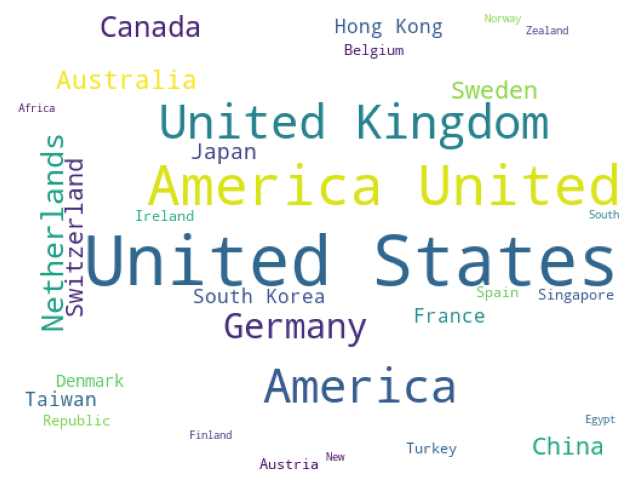

In [14]:
# data prepararion
x2011 = timesData.country[timesData.year == 2011]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

<a id="9"></a> <br>
# Box Plots
* Box Plots
    * Median (50th percentile) = middle value of the data set. Sort and take the data in the middle. It is also called 50% percentile that is 50% of data are less that median(50th quartile)(quartile)
        * 25th percentile = quartile 1 (Q1) that is lower quartile
        * 75th percentile = quartile 3 (Q3) that is higher quartile
        * height of box = IQR = interquartile range = Q3-Q1
        * Whiskers = 1.5 * IQR from the Q1 and Q3
        * Outliers = being more than 1.5*IQR away from median commonly.
        
    * trace = box
        * y = data we want to visualize with box plot 
        * marker = color

In [15]:
# data preparation
x2015 = timesData[timesData.year == 2015]
x2015['total_score'].unique()

array(['94.3', '93.3', '93.2', '92.9', '92.0', '91.9', '90.9', '89.5',
       '87.5', '87.1', '85.5', '84.6', '84.4', '83.0', '81.0', '80.9',
       '79.9', '79.4', '79.3', '79.2', '78.7', '76.1', '74.3', '73.3',
       '73.2', '72.8', '72.3', '71.9', '71.8', '71.2', '70.9', '70.4',
       '70.0', '69.9', '69.6', '69.4', '68.6', '67.8', '67.5', '66.8',
       '66.5', '65.9', '65.2', '65.1', '64.8', '64.7', '64.5', '64.1',
       '63.7', '63.6', '62.9', '62.8', '62.7', '62.2', '61.9', '61.3',
       '61.2', '61.1', '61.0', '60.7', '59.8', '59.6', '59.2', '59.1',
       '59.0', '58.9', '58.4', '58.2', '58.1', '58.0', '57.9', '57.6',
       '57.3', '56.9', '56.6', '56.5', '56.4', '56.2', '56.1', '55.5',
       '55.3', '55.2', '55.1', '54.6', '54.3', '54.0', '53.9', '53.8',
       '53.7', '53.6', '53.4', '53.2', '53.1', '53.0', '52.9', '52.8',
       '52.7', '52.6', '52.5', '52.4', '52.1', '52.0', '51.9', '51.6',
       '51.4', '51.2', '51.1', '51.0', '50.9', '50.5', '50.4', '50.3',
      

In [16]:
x2015['total_score'] = x2015['total_score'].str.replace('-','0')
x2015['total_score'] = x2015['total_score'].astype(float)
x2015.dtypes

world_rank                 object
university_name            object
country                    object
teaching                  float64
international              object
research                  float64
citations                 float64
income                     object
total_score               float64
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object

In [17]:
trace0 = go.Box(y = x2015['total_score'],
                name = 'Total score in 2015')

trace1 = go.Box(y = x2015['research'],
                name = 'Total research in 2015')


data = [trace0, trace1]
iplot(data)

<a id="10"></a> <br>
# Scatter Matrix Plots
Scatter Matrix = it helps us to see covariance and relation between more than 2 features
* import figure factory as ff
* create_scatterplotmatrix = creates scatter plot
    * data2015 = prepared data. It includes research, international and total scores with index from 1 to 401
    * colormap = color map of scatter plot
    * colormap_type = color type of scatter plot
    * height and weight

In [44]:
# data2015['international'] = data2015['international'].str.replace('-','0')
# data2015['total_score'] = data2015['total_score'].str.replace('-','0')
# data2015['international'] = data2015['international'].astype(float)
# data2015['total_score'] = data2015['total_score'].astype(float)
# data2015.dtypes

In [18]:
# prepare data
dataframe = timesData[timesData.year == 2015]
data2015 = dataframe.loc[:,["research","international", "total_score"]]
data2015["new_world_rank"] = np.arange(1,len(data2015)+1)

data2015['international'] = data2015['international'].str.replace('-','0')
data2015['total_score'] = data2015['total_score'].str.replace('-','0')
data2015['international'] = data2015['international'].astype(float)
data2015['total_score'] = data2015['total_score'].astype(float)

In [24]:
data2015

,research,international,total_score,new_world_rank
1402,98.1,67.0,94.3,1
1403,98.6,67.6,93.3,2
1404,97.7,90.7,93.2,3
1405,96.7,69.0,92.9,4
1406,95.6,87.8,92.0,5
...,...,...,...,...
1798,16.3,43.1,0.0,397
1799,27.5,36.0,0.0,398
1800,22.4,50.1,0.0,399
1801,17.4,33.1,0.0,400


In [22]:
# import figure factory
import plotly.figure_factory as ff


# scatter matrix
fig = ff.create_scatterplotmatrix(data2015,
                                 diag = 'box',
                                 index ='new_world_rank',
                                 colormap = 'Portland',
                                 height = 700,
                                 width = 700)

iplot(fig)

<a id="11"></a> <br>
# Inset Plots
<font color='red'>
Inset Matrix = 2 plots are in one frame
<font color='black'>

In [20]:
# first line plot
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.teaching,
    name = "teaching",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
)

# second line plot
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x2',
    yaxis='y2',
    name = "income",
    marker = dict(color = 'rgba(160, 112, 20, 0.8)'),
)
data = [trace1, trace2]

layout = go.Layout(
    xaxis2=dict(
        domain=[0.6, 0.95],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = 'Income and Teaching vs World Rank of Universities'

)

fig = go.Figure(data=data, layout=layout)
iplot(fig)


<a id="12"></a> <br>
# 3D Scatter Plot with Colorscaling
3D Scatter: Sometimes 2D is not enough to understand data. Therefore adding one more dimension increase the intelligibility of the data. Even we will add color that is actually 4th dimension.
* go.Scatter3d: create 3d scatter plot
* x,y,z: axis of plots
* mode: market that is scatter
* size: marker size
* color: axis of colorscale
* colorscale:  actually it is 4th dimension

In [23]:
# create trace 1 that is 3d scatter
trace1 = go.Scatter3d(x = dataframe['world_rank'],
                     y = dataframe['research'],
                     z = dataframe['citations'],
                     mode = 'markers',
                     marker = dict(size = 5, color = 'rgb(255,0,0)'))

data = [trace1]
layout = go.Layout()

fig = go.Figure(data=data, layout=layout)
iplot(fig)

<a id="13"></a> <br>
# Multiple Subplots
<font color='red'>
Multiple Subplots: While comparing more than one features, multiple subplots can be useful.
<font color='black'>



In [24]:
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.research,
    xaxis='x1',
    yaxis='y1',
    name = "research"
)
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.citations,
    xaxis='x2',
    yaxis='y2',
    name = "citations"
)
trace3 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x3',
    yaxis='y3',
    name = "income"
)
trace4 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.total_score,
    xaxis='x4',
    yaxis='y4',
    name = "total_score"
)
data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45],
        anchor='y1'
    ),
    yaxis=dict(
        domain=[0, 0.45],
        anchor='x1'
    ),
    xaxis2=dict(
        domain=[0.55, 1],
        anchor='y2'
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1],
        anchor='x3'
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Research, citation, income and total score VS World Rank of Universities'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

# Export to HTML
Plotly figures are interactive when viewed in a web browser: you can hover over data points, pan and zoom axes, and show and hide traces by clicking or double-clicking on the legend. You can export figures either to static image file formats like PNG, JEPG, SVG or PDF or you can export them to HTML files which can be opened in a browser. This page explains how to do the latter.


In [25]:
# fig is the last fig object run in the notebook
fig.write_html("4 charts in one.html")

In [30]:
df

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,University of Arizona,United States of America,52.4,21.9,52.2,70.1,84.2,57.3,"36,429",12.7,8%,52 : 48,2011
96,95,University of Basel,Switzerland,50.2,91.3,37.1,78.3,45.8,57.3,"12,551",17.3,24%,54 : 46,2011
97,98,"University of Maryland, College Park",United States of America,45.4,35.4,48.6,79.2,-,57.2,"31,331",8.4,9%,48 : 52,2011
98,99,Dartmouth College,United States of America,44.7,31.0,49.2,79.7,-,57.1,"6,178",6.6,16%,47 : 53,2011


In [26]:
import plotly.express as px
df = px.data.gapminder().query("year==2007")
fig = px.scatter_geo(df, locations="iso_alpha", color="continent",
                     hover_name="country", size="pop",
                     projection="natural earth")
fig.show()